<a href="https://colab.research.google.com/github/1aishwarye/first-eda-capstone-project/blob/main/EDA_Airbnb_Bookings_Analysis_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? 
* which properties are most preferable?
* how many  properties are availabel for more thn 200 days?
* which neighbourhood group has highest number of airbnb?


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from datetime import datetime
from datetime import date
import seaborn as sns

In [ ]:
#lets start with mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the file
airbnb_file_path = '/content/drive/MyDrive/AirBnB Bookings Analysis/'
df_airbnb = pd.read_csv(airbnb_file_path + 'Airbnb NYC 2019.csv')

In [ ]:
df_airbnb.shape

(48895, 16)

In [ ]:
#getting the information on data frame

df_airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
df_airbnb.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**so as we can see tht thr r few null vALUES In name and neighbourhood_group coloumns but thr r so many null values in last_review and reviews_per_month coloumns and according to the given problems we dont need last_review  and review_per_month so we can remove thm and we can replace the null value of name and neighbourhood group with some variable for further analysis and we also dont need latitude and longitude,so we can also substitue thm**            

In [ ]:
#Data cleaning
#so firstly we are keeping coloumns from dataframe which  will benefits our analysis

In [ ]:
df_airbnb = df_airbnb[['id'	,'name'	,'host_id'	,'host_name'	,'neighbourhood_group'	,'neighbourhood','room_type'	,'price'	,'minimum_nights'	,'number_of_reviews'	,'calculated_host_listings_count'	,'availability_365']]

In [ ]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
df_airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,Private room,90,7,0,1,23


In [ ]:
#we are filling null values with not known 
df_airbnb['name'].fillna('not known',inplace = True)
df_airbnb['host_name'].fillna('not present',inplace = True)

**so nw we have choosen those coloumns which are necessary for our analysis,nd fill the null values**

In [ ]:
df_airbnb.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


**as we can see tht thr r maximum price of a airbnb property is 10000 but the minimum price of any property is 0 and tht can  not be possible so we need to make some changes in data set**

**we can replace the 0 value with median of the rest of the data set**

In [ ]:
median = df_airbnb[~df_airbnb['price'] == 0].median()

In [19]:
df_airbnb = df_airbnb.replace(0,median)

In [20]:
df_airbnb.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48884.000000,48895.000000,38843.000000,48895.000000,31362.000000
mean,1.901714e+07,6.762001e+07,152.755053,7.029962,29.297557,7.143982,175.831994
std,1.098311e+07,7.861097e+07,240.170260,20.510550,48.186374,32.952519,126.187636
min,2.539000e+03,2.438000e+03,10.000000,1.000000,1.000000,1.000000,1.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,3.000000,1.000000,55.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,9.000000,1.000000,168.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,33.000000,2.000000,305.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


**now min price for airbnb is 10 .now our whole data is clean now we can do analysis on this dataset**

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

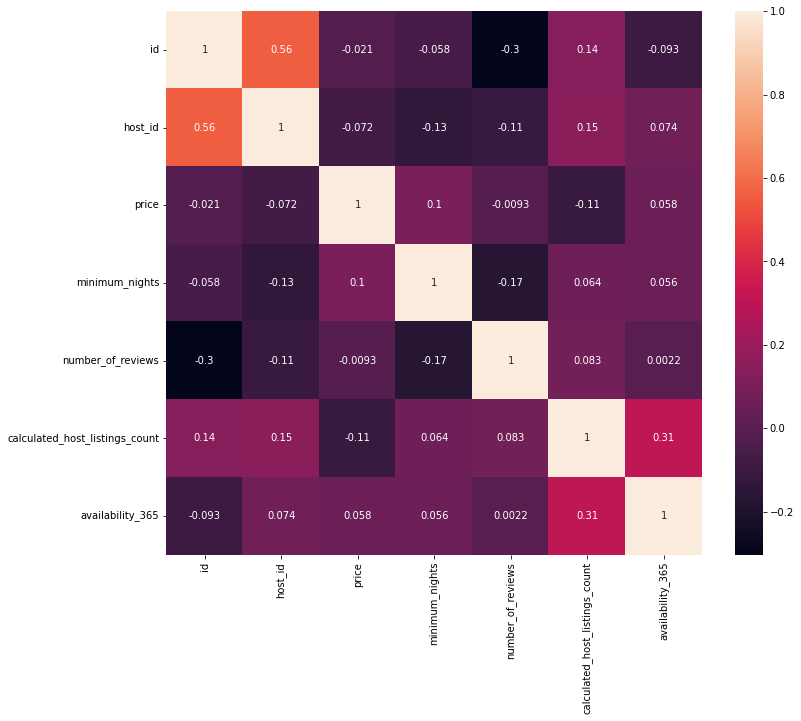

In [22]:
# building a correlation graph
corr = df_airbnb.corr(method='spearman')
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
df_airbnb.columns

**there are various correlation we can see tht. if availability increase so listing count will also increase we can see tht in our heatmap they both correlated with(0.24).so through same process we can find the correlation between every column**


#.1.What can we learn about diffrent hosts and areas?

In [23]:
#here we are performing groupby 
df1 = df_airbnb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
df2 = df1.sort_values('calculated_host_listings_count',ascending = False)
area_count = df2.head(10)

In [24]:
area_count

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
432,Alex,Manhattan,134
9856,Mike,Manhattan,134


In [25]:
# data visualization
plt.rcParams['figure.figsize'] = (12, 6)

Text(0, 0.5, 'calculated_host_listings_count')

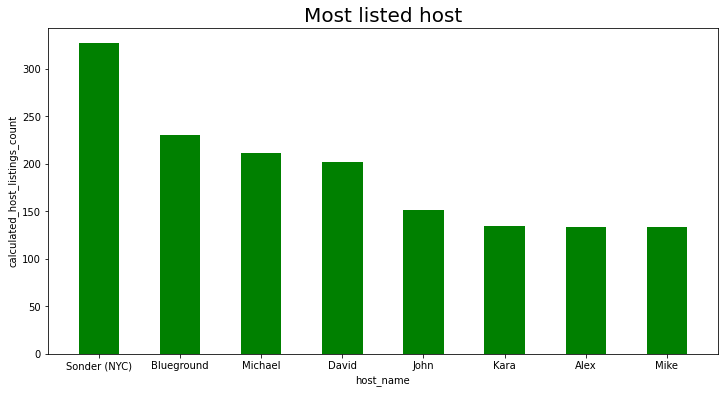

In [26]:
plt.bar(area_count['host_name'],area_count['calculated_host_listings_count'],color = 'green',width = 0.5)
plt.title('Most listed host',{'fontsize':20})
plt.xlabel('host_name')
plt.ylabel('calculated_host_listings_count')


## We can see from tha bar chart that most number of listing are from Manhattan by host_name Sonder(NYC) followed by Blueground and Michael



##2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [27]:
#first we ll work with prices
prices_room_type =df_airbnb.groupby('room_type').agg({'price':['max','mean'],'id':'count'}).reset_index()

In [28]:
prices = prices_room_type.head()

In [29]:
prices

room_type    price                 id
                        max        mean  count
0  Entire home/apt  10000.0  211.810918  25409
1     Private room  10000.0   89.809131  22326
2      Shared room   1800.0   70.248705   1160

## **as here is  id's count is number of room type and with the this we can easily predict tht because of heavy requirment of entire home & private rooms,mean price of them are on higher side**

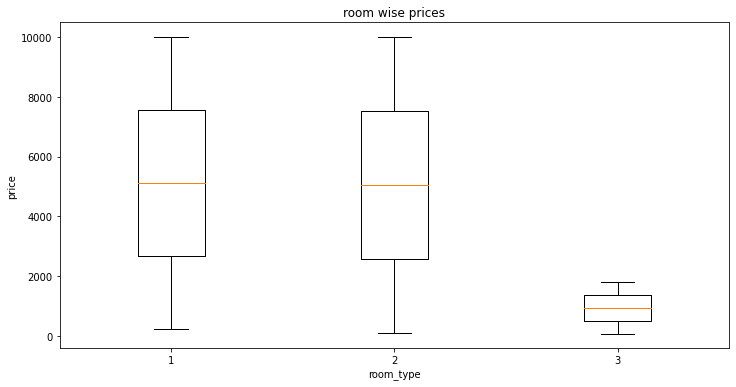

In [30]:

#data visualization
plt.boxplot(prices_room_type['price'])
plt.title('room wise prices')
plt.xlabel('room_type')
plt.ylabel('price')
plt.show()

In [ ]:
#room type distribution in the neighbourhood group

in this we want to know that what kind and number of room_type each neighbourhood are having.this we can easily understaand by a counterplot.

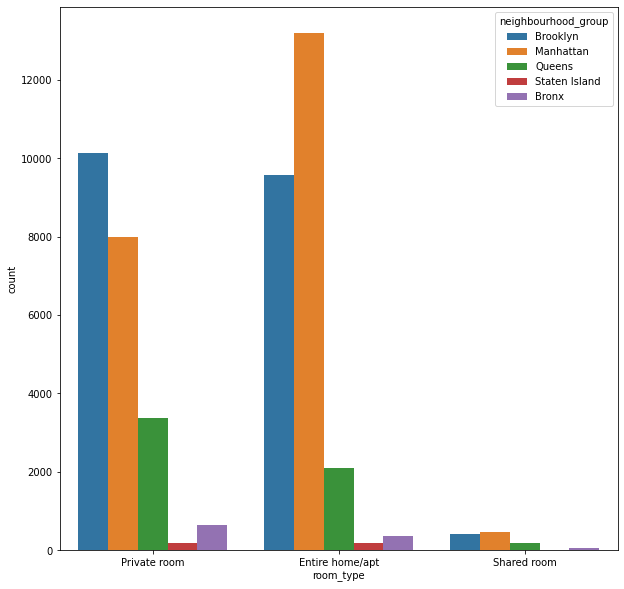

In [31]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="room_type", data=df_airbnb,hue="neighbourhood_group")

##From above visualizations we can say that there are very few shared room cause its demand is very low .brooklyn has the highest number of private rooms and Manhattan has most number of entire home/apt


##3. Which hosts are busiest and why?

In [32]:

df3 = df_airbnb.groupby(['host_name','room_type'])['minimum_nights'].count().reset_index()

In [33]:
df4 = df3.sort_values('minimum_nights',ascending = False)

In [34]:
df5 = df4.head(10)
df5

,host_name,room_type,minimum_nights
12508,Sonder (NYC),Entire home/apt,319
9171,Michael,Entire home/apt,251
1744,Blueground,Entire home/apt,232
3084,David,Entire home/apt,214
3085,David,Private room,184
413,Alex,Entire home/apt,175
6415,John,Private room,153
9172,Michael,Private room,152
9281,Mike,Entire home/apt,141
6414,John,Entire home/apt,135


Text(0, 0.5, 'minimum night stay')

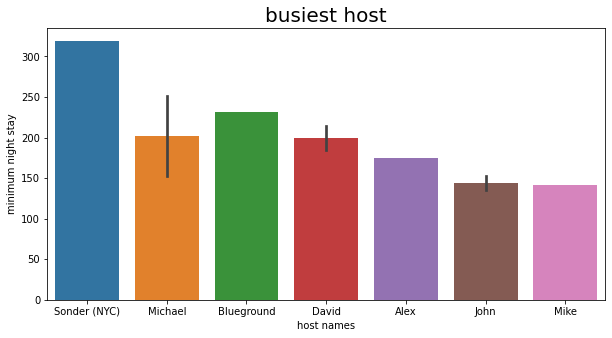

In [35]:
#data visualization
plt.rcParams['figure.figsize'] = (10,5)
z = sns.barplot(x = df5['host_name'],y = df5['minimum_nights'])
z.set_title('busiest host',{'fontsize':20})
z.set_xlabel('host names')
z.set_ylabel('minimum night stay')


Busiest hosts are:
1.   Sonder (NYC)
2.   Michael
3.   Blueground
4.   David


Because these hosts listed room type as Entire home and Private room which is preferred by most number of people and they are providing the rooms in the preferred locations .

##4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [39]:

df6 = df_airbnb.groupby(['neighbourhood','neighbourhood_group',])['minimum_nights'].count().reset_index()

In [40]:
traffic_areas = df6.sort_values('minimum_nights',ascending = False)

In [41]:
traffic_areas.head()

,neighbourhood,neighbourhood_group,minimum_nights
214,Williamsburg,Brooklyn,3920
13,Bedford-Stuyvesant,Brooklyn,3714
94,Harlem,Manhattan,2658
28,Bushwick,Brooklyn,2465
202,Upper West Side,Manhattan,1971


In [42]:
traffic_areas.tail()

,neighbourhood,neighbourhood_group,minimum_nights
165,Richmondtown,Staten Island,1
215,Willowbrook,Staten Island,1
82,Fort Wadsworth,Staten Island,1
141,New Dorp,Staten Island,1
219,Woodrow,Staten Island,1


##We can say from above visualizations that the most traffic is in Manhattan and Brooklyn as the host there are providing the prefrred rooms by the people in those locations and these locations are most visited locations and also the beacause of the pricing.


##5.Which properties are most preferable?

In [43]:
df10 = df_airbnb.groupby('name')['number_of_reviews'].sum().reset_index()

In [44]:
reviews = df10.sort_values(	'number_of_reviews',ascending=False)
no_of_reviews = reviews.head()
no_of_reviews 

,name,number_of_reviews
32777,Private Bedroom in Manhattan,666.0
36516,Room near JFK Queen Bed,629.0
5722,Beautiful Bedroom in Manhattan,617.0
20860,Great Bedroom in Manhattan,607.0
36161,Room Near JFK Twin Beds,576.0


##From above we can see Private Bedroom in Manhattan has most no of reviews of 666 so here we can say tht Private Bedroom in Manhattan is most preferable properties of whole data set.

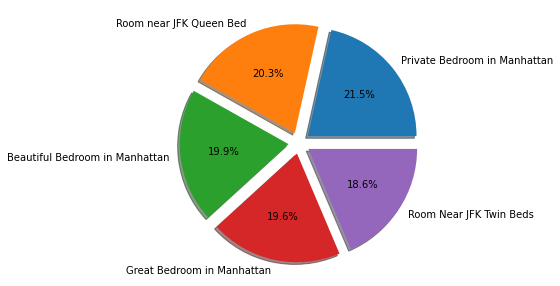

In [45]:
#data visualization
plt.pie(no_of_reviews['number_of_reviews'],labels=no_of_reviews['name'],explode=[0.1,0.1,0.1,0.1,0.1],autopct ='%2.1f%%',shadow = True)

plt.show()


#6.How many properties are availabel for more thn 200 days?


In [46]:
often_availabel = df_airbnb[df_airbnb['availability_365'] >= 200]

In [47]:
often_availabel['availability_365'].count()

13368

In [48]:
percent_availabel_more =often_availabel['availability_365'].count()/df_airbnb['availability_365'].count()*100

In [49]:
percent_availabel_more.round(2)

42.62

**so 42.62% of properties are availabel for more thn 200 days.most of the properties doesnt work full year** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

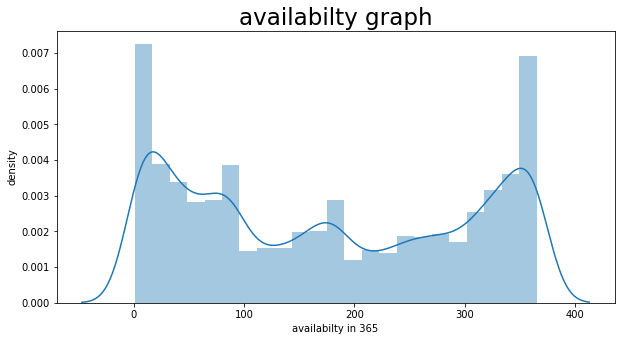

In [50]:
#data visualization
a=sns.distplot(df_airbnb['availability_365'])
a.set_title('availabilty graph',{'fontsize':23})
a.set_xlabel('availabilty in 365')
a.set_ylabel('density')


#7 -Which neighbourhood group has highest number of airbnb?

In [51]:
#now we are working on prblm no 7
#so as we know tht all airbnb have different id so we can check with tht
df11 = df_airbnb.groupby('neighbourhood_group')['id'].count().reset_index()

In [52]:
#here id the number of airbnb 
df11.sort_values('id',ascending = False)

,neighbourhood_group,id
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


Text(0, 0.5, 'number of airbnb')

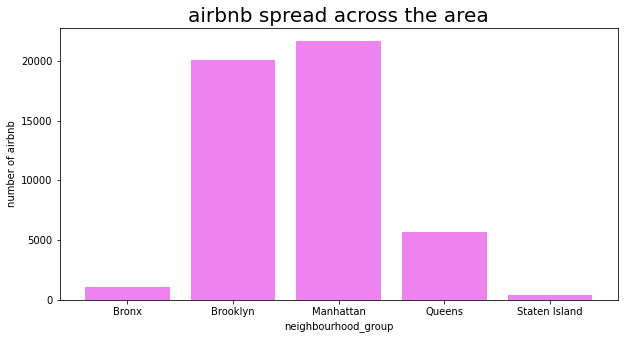

In [53]:
#here id represent the number of airbnb present in tht neighbourhood group
#now plot
plt.bar(df11['neighbourhood_group'],df11['id'],color = 'violet')
plt.title('airbnb spread across the area',{'fontsize': 20})
plt.xlabel('neighbourhood_group')
plt.ylabel('number of airbnb')

**SO here we can see tht manhattan has the most number of airbnb after thn brooklyn has the second place.Bronx and staten island has very less number of airbnb present**